<a href="https://colab.research.google.com/github/yeeshuen02/Bank-Customer-Churning/blob/main/ML_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("BankChurners.csv", header=0)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.shape

(10127, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

### Data Preprocessing

In [ ]:
# Drop unwanted column in dataset
df.drop("CLIENTNUM", axis=1, inplace=True)
df.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", axis=1, inplace=True)
df.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2", axis=1, inplace=True)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### Exploratory Data Analysis

In [ ]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
df_catd = ['Gender', 'Education_Level', 'Marital_Status','Income_Category', 'Card_Category']

for column in df_catd:
    frequency_table = df[column].value_counts()
    print(frequency_table)

F    5358
M    4769
Name: Gender, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


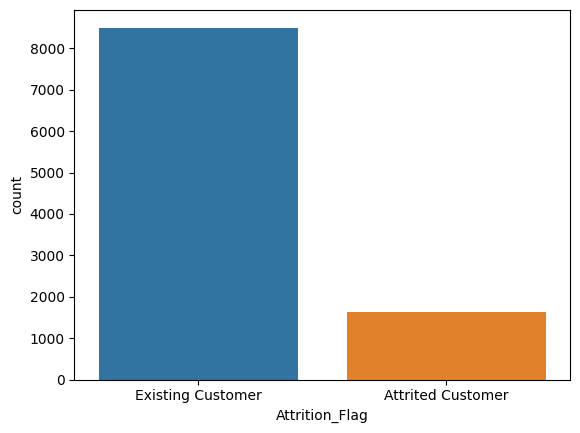

In [ ]:
sns.countplot(x='Attrition_Flag', data=df)
plt.show()

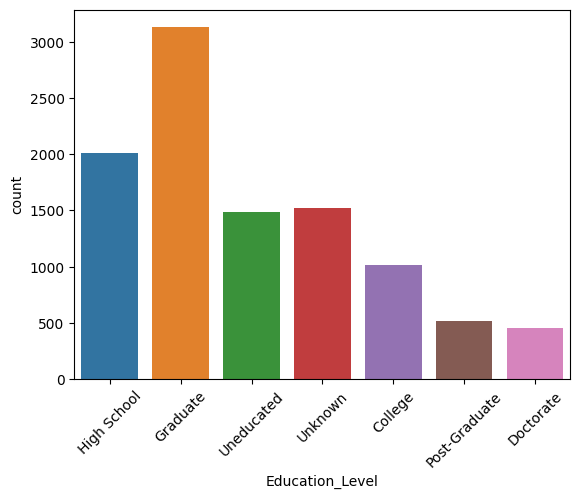

In [ ]:
sns.countplot(x='Education_Level', data=df)
plt.xticks(rotation=45)
plt.show()

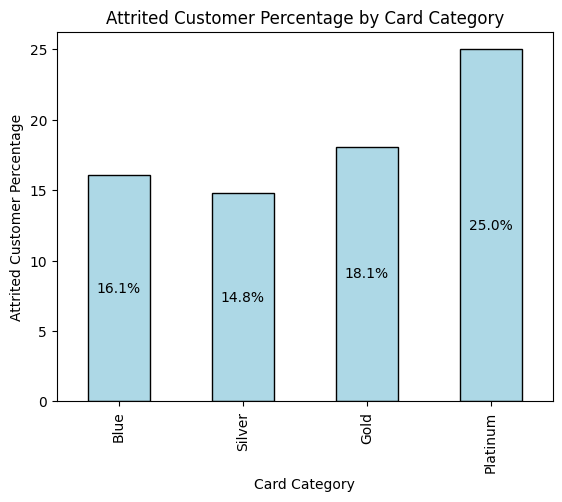

In [ ]:
# Calculate the attrited customer percentage for each card category
attrited_percentage = df[df['Attrition_Flag'] == 'Attrited Customer']['Card_Category'].value_counts() / df['Card_Category'].value_counts() * 100

#plt.figure(figsize=(8, 8))  # Adjust the figure size if needed

# Create a bar plot
attrited_percentage.plot(kind='bar', color='lightblue', edgecolor='black')

plt.xlabel('Card Category')  # Add an x-axis label
plt.ylabel('Attrited Customer Percentage')  # Add a y-axis label
plt.title('Attrited Customer Percentage by Card Category')  # Add a title to the plot

# Display the attrited customer percentage values in the bars
for i in range(len(attrited_percentage)):
    plt.text(i, attrited_percentage[i] / 2, f'{attrited_percentage[i]:.1f}%', ha='center', va='center')

plt.show()

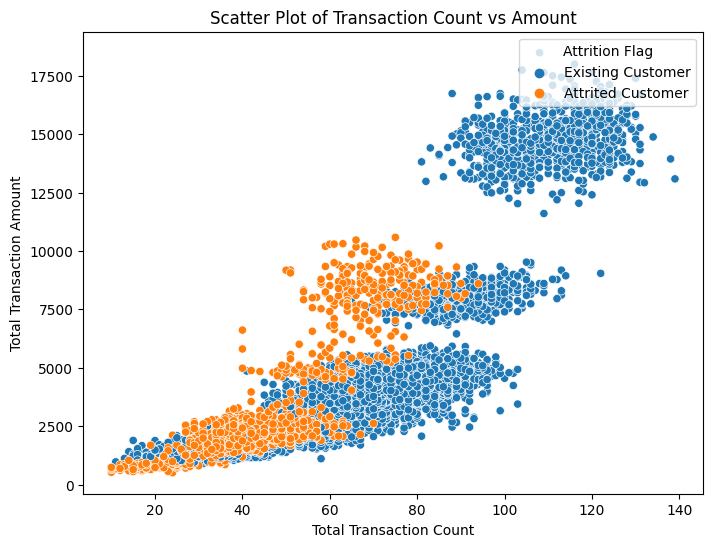

In [ ]:
plt.figure(figsize=(8, 6))

# Create the scatter plot
sns.scatterplot(data=df, x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Attrition_Flag')

plt.ylabel('Total Transaction Amount')  # Add an x-axis label
plt.xlabel('Total Transaction Count')  # Add a y-axis label
plt.title('Scatter Plot of Transaction Count vs Amount')  # Add a title to the plot

plt.legend(title='Attrition Flag', loc='upper right')  # Add a legend

plt.show()

### Data Transformation

In [ ]:
label_encoder = LabelEncoder()
df_label = df.copy()

df_label['Attrition_Flag'] = label_encoder.fit_transform(df_label['Attrition_Flag'])
df_label['Attrition_Flag'] = df_label['Attrition_Flag'].map({1: 1, 0: 0})
label_mapping = {1: 'Attrited Customer', 0: 'Existing Customer'}
print("Attrition Flag: ", label_mapping)

df_label['Card_Category'] = label_encoder.fit_transform(df_label['Card_Category'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Card Category: ", label_mapping)

df_label['Gender'] = label_encoder.fit_transform(df_label['Gender'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Gender: ", label_mapping)

Attrition Flag:  {1: 'Attrited Customer', 0: 'Existing Customer'}
Card Category:  {'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}
Gender:  {'F': 0, 'M': 1}


In [ ]:
df_label.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,High School,Married,$60K - $80K,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,Graduate,Single,Less than $40K,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,Graduate,Married,$80K - $120K,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,High School,Unknown,Less than $40K,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,Uneducated,Married,$60K - $80K,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Handling categorical variables and feature engineering
# One-hot encoding
one_hot_encoder = OneHotEncoder(sparse=False)

df_categorical = df_label.select_dtypes(include=['object'])

# Encode categorical columns
one_hot_encoded = one_hot_encoder.fit_transform(df_categorical)

# Create column names for encoded columns
column_names = []
for feature in one_hot_encoder.categories_:
    column_names.extend(feature)

# Create a DataFrame with the encoded columns
df_encoded = pd.DataFrame(one_hot_encoded, columns=column_names)

# Concatenate the encoded columns with the original DataFrame
df_one_hot = pd.concat([df_label, df_encoded], axis=1)

print(df_one_hot)

       Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0                   1            45       1                3     High School   
1                   1            49       0                5        Graduate   
2                   1            51       1                3        Graduate   
3                   1            40       0                4     High School   
4                   1            40       1                3      Uneducated   
...               ...           ...     ...              ...             ...   
10122               1            50       1                2        Graduate   
10123               0            41       1                2         Unknown   
10124               0            44       0                1     High School   
10125               0            30       1                2        Graduate   
10126               0            43       0                2        Graduate   

      Marital_Status Income_Category  C

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### Feature Selection

In [ ]:
df_corr = df_one_hot[['Attrition_Flag','Customer_Age','Dependent_count','Months_on_book',
           'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon',
           'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
           'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]
# Calculate correlation coefficient
correlation = df_corr.corr()

# Print correlation matrix
correlation

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,1.000000,-0.018203,-0.018991,-0.013687,0.150005,-0.152449,-0.204491,0.023873,0.263053,0.000285,0.131063,0.168598,0.371403,0.290054,0.178410
Customer_Age,-0.018203,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.018991,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,-0.013687,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.150005,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,-0.152449,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.204491,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.023873,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.263053,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.000285,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


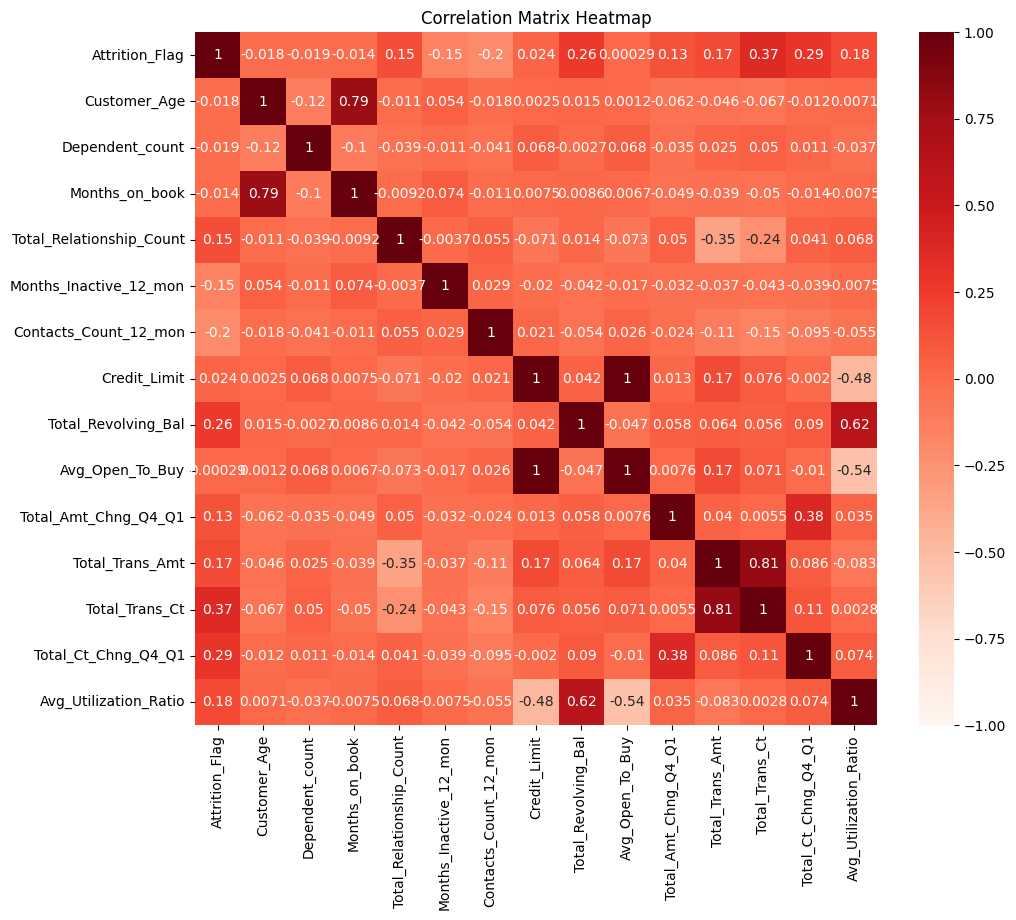

In [ ]:
# Create a heatmap using seaborn
plt.figure(figsize=(11, 9))
sns.heatmap(correlation, annot=True, cmap='Reds', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df_one_hot.drop("Avg_Utilization_Ratio", axis=1, inplace=True)
df_one_hot.drop("Total_Trans_Amt", axis=1, inplace=True)

In [ ]:
df_one_hot

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Divorced,Married,Single,Unknown,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
0,1,45,1,3,High School,Married,$60K - $80K,0,39,5,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,49,0,5,Graduate,Single,Less than $40K,0,44,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,51,1,3,Graduate,Married,$80K - $120K,0,36,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,40,0,4,High School,Unknown,Less than $40K,0,34,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,40,1,3,Uneducated,Married,$60K - $80K,0,21,5,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,Graduate,Single,$40K - $60K,0,40,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10123,0,41,1,2,Unknown,Divorced,$40K - $60K,0,25,4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10124,0,44,0,1,High School,Married,Less than $40K,0,36,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10125,0,30,1,2,Graduate,Unknown,$40K - $60K,0,36,4,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Sampling Methods

### RUS

In [ ]:
df_rus = pd.DataFrame(df_one_hot)
print(df_rus.head())

   Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0               1            45       1                3     High School   
1               1            49       0                5        Graduate   
2               1            51       1                3        Graduate   
3               1            40       0                4     High School   
4               1            40       1                3      Uneducated   

  Marital_Status Income_Category  Card_Category  Months_on_book  \
0        Married     $60K - $80K              0              39   
1         Single  Less than $40K              0              44   
2        Married    $80K - $120K              0              36   
3        Unknown  Less than $40K              0              34   
4        Married     $60K - $80K              0              21   

   Total_Relationship_Count  ...  Divorced  Married  Single  Unknown  $120K +  \
0                         5  ...       0.0      1.0     0.0

In [ ]:
X=df_rus.drop(columns=['Attrition_Flag', 'Education_Level', 'Income_Category', 'Marital_Status'])
y=df_rus['Attrition_Flag']

rus = RandomUnderSampler(sampling_strategy=0.5, random_state=200)
x_rus, y_rus = rus.fit_resample(X, y)

print('Original dataset shape:\n', y.value_counts())
print('Undersampled dataset shape:\n', y_rus.value_counts())

ndf = pd.DataFrame(x_rus)
ndf['Attrition_Flag'] = y_rus
ndf.shape

Original dataset shape:
 1    8500
0    1627
Name: Attrition_Flag, dtype: int64
Undersampled dataset shape:
 1    3254
0    1627
Name: Attrition_Flag, dtype: int64


(4881, 32)

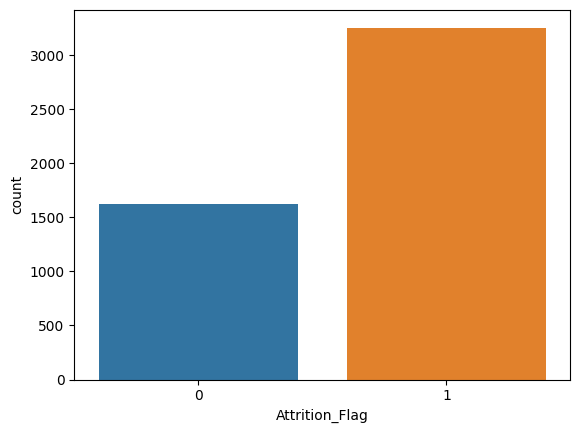

In [ ]:
sns.countplot(x='Attrition_Flag', data=ndf)
plt.show()

### SMOTE

In [ ]:
df_smote = pd.DataFrame(df_one_hot)
print(df_smote.head())

   Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0               1            45       1                3     High School   
1               1            49       0                5        Graduate   
2               1            51       1                3        Graduate   
3               1            40       0                4     High School   
4               1            40       1                3      Uneducated   

  Marital_Status Income_Category  Card_Category  Months_on_book  \
0        Married     $60K - $80K              0              39   
1         Single  Less than $40K              0              44   
2        Married    $80K - $120K              0              36   
3        Unknown  Less than $40K              0              34   
4        Married     $60K - $80K              0              21   

   Total_Relationship_Count  ...  Divorced  Married  Single  Unknown  $120K +  \
0                         5  ...       0.0      1.0     0.0

In [ ]:
X_smote=df_smote.drop(columns=['Attrition_Flag', 'Education_Level', 'Income_Category', 'Marital_Status'])
y_smote=df_smote['Attrition_Flag']

smote = SMOTE(sampling_strategy=0.5)
x_oversample, y_oversample = smote.fit_resample(X_smote, y_smote)

print('Original dataset shape:\n', y_smote.value_counts())
print('Oversampled dataset shape:\n', y_oversample.value_counts())

sdf = pd.DataFrame(x_oversample)
sdf['Attrition_Flag'] = y_oversample
sdf.shape

Original dataset shape:
 1    8500
0    1627
Name: Attrition_Flag, dtype: int64
Oversampled dataset shape:
 1    8500
0    4250
Name: Attrition_Flag, dtype: int64


(12750, 32)

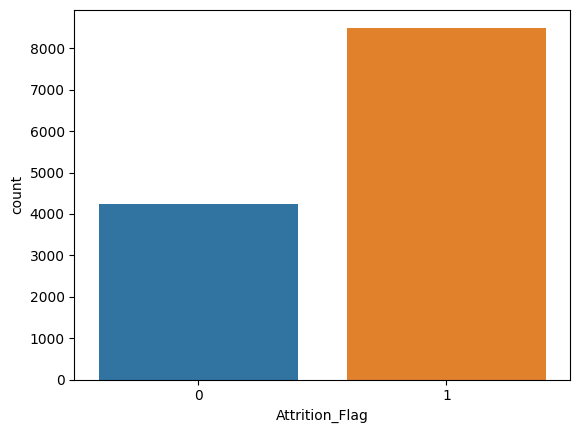

In [ ]:
sns.countplot(x='Attrition_Flag', data=sdf)
plt.show()

## Model Development with RUS

In [ ]:
X = ndf.drop('Attrition_Flag', axis=1)
y = ndf['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [ ]:
log = LogisticRegression(solver='lbfgs', max_iter=10000)
log.fit(X_train, y_train)

#Test set prediction
y_pred_log = log.predict(X_test)
y_pred_prob_log = log.predict_proba(X_test)[:, 1]
cr = classification_report(y_test, y_pred_log)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       349
           1       0.83      0.88      0.86       628

    accuracy                           0.81       977
   macro avg       0.80      0.78      0.79       977
weighted avg       0.81      0.81      0.81       977



In [ ]:
print('Precision Score: ', round(precision_score(y_test, y_pred_log), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_log), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_log), 2))
lr_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy Score: {lr_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_prob_log), 2))

Precision Score:  0.83
Recall Score:  0.88
F1 Score:  0.86
Accuracy Score: 80.96%
ROC AUC:  0.88


<Axes: >

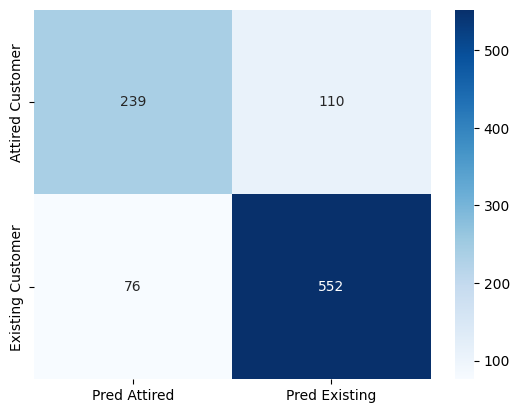

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_log),
    cmap = 'Blues',
    annot = True,
    fmt = 'd',
    yticklabels = ['Attired Customer', 'Existing Customer'],
    xticklabels = ['Pred Attired', 'Pred Existing']
)

### K-Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
cr_knn = classification_report(y_test, y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.65      0.52      0.58       349
           1       0.76      0.85      0.80       628

    accuracy                           0.73       977
   macro avg       0.71      0.68      0.69       977
weighted avg       0.72      0.73      0.72       977



In [ ]:
print('Precision Score: ', round(precision_score(y_test, y_pred_knn), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_knn), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_knn), 2))
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score: {knn_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_prob_knn), 2))

Precision Score:  0.76
Recall Score:  0.85
F1 Score:  0.8
Accuracy Score: 73.08%
ROC AUC:  0.76


<Axes: >

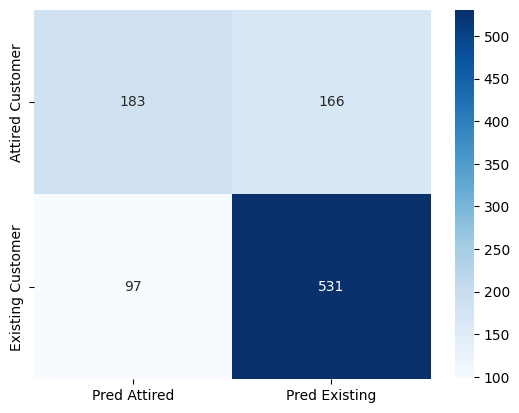

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_knn),
    cmap = 'Blues',
    annot = True,
    fmt = 'd',
    yticklabels = ['Attired Customer', 'Existing Customer'],
    xticklabels = ['Pred Attired', 'Pred Existing']
)

## Model Development with SMOTE

In [ ]:
X = sdf.drop('Attrition_Flag', axis=1)
y = sdf['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [ ]:
log = LogisticRegression(solver='lbfgs', max_iter=10000)
log.fit(X_train, y_train)

#Test set prediction
y_pred_log = log.predict(X_test)
y_pred_prob_log = log.predict_proba(X_test)[:, 1]
cr = classification_report(y_test, y_pred_log)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       834
           1       0.86      0.90      0.88      1716

    accuracy                           0.83      2550
   macro avg       0.82      0.80      0.81      2550
weighted avg       0.83      0.83      0.83      2550



In [ ]:
print('Precision Score: ', round(precision_score(y_test, y_pred_log), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_log), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_log), 2))
lr_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy Score: {lr_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_prob_log), 2))

Precision Score:  0.86
Recall Score:  0.9
F1 Score:  0.88
Accuracy Score: 83.45%
ROC AUC:  0.89


<Axes: >

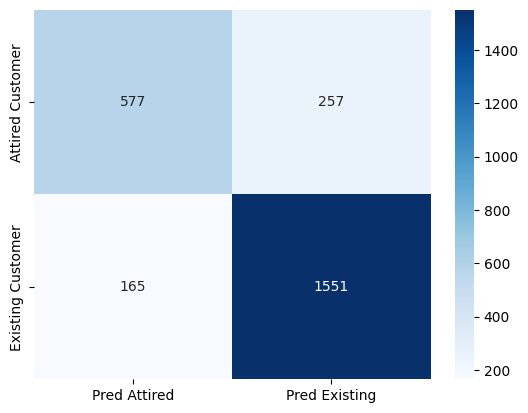

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_log),
    cmap = 'Blues',
    annot = True,
    fmt = 'd',
    yticklabels = ['Attired Customer', 'Existing Customer'],
    xticklabels = ['Pred Attired', 'Pred Existing']
)

### K-Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
cr_knn = classification_report(y_test, y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       834
           1       0.89      0.87      0.88      1716

    accuracy                           0.84      2550
   macro avg       0.81      0.82      0.82      2550
weighted avg       0.84      0.84      0.84      2550



In [ ]:
print('Precision Score: ', round(precision_score(y_test, y_pred_knn), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_knn), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_knn), 2))
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score: {knn_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_prob_knn), 2))

Precision Score:  0.89
Recall Score:  0.87
F1 Score:  0.88
Accuracy Score: 83.76%
ROC AUC:  0.89


<Axes: >

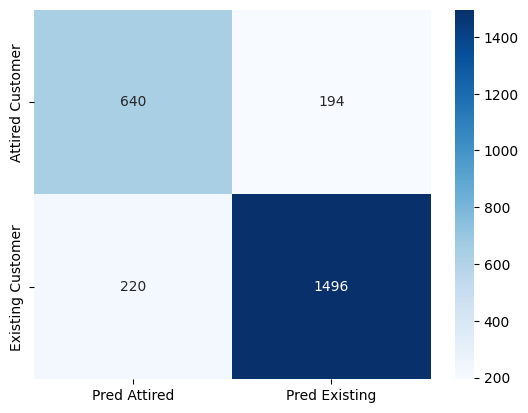

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_knn),
    cmap = 'Blues',
    annot = True,
    fmt = 'd',
    yticklabels = ['Attired Customer', 'Existing Customer'],
    xticklabels = ['Pred Attired', 'Pred Existing']
)

### Standardization

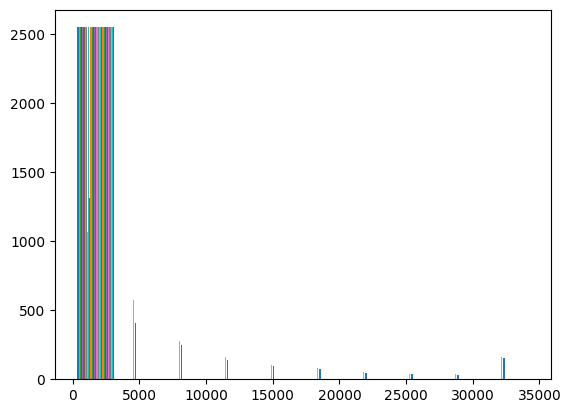

In [ ]:
plt.hist(X_test)
plt.show()

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

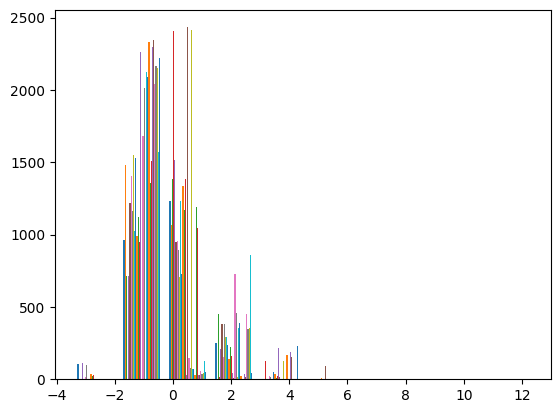

In [ ]:
plt.hist(X_test_sc)
plt.show()

### Logistic Regression with Standardization

In [ ]:
log = LogisticRegression(solver='lbfgs', max_iter=10000)
log.fit(X_train_sc, y_train)

#Test set prediction
y_pred_log = log.predict(X_test_sc)
y_pred_prob_log = log.predict_proba(X_test_sc)[:, 1]
cr = classification_report(y_test, y_pred_log)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       834
           1       0.89      0.92      0.91      1716

    accuracy                           0.87      2550
   macro avg       0.86      0.84      0.85      2550
weighted avg       0.87      0.87      0.87      2550



In [ ]:
print('Precision Score: ', round(precision_score(y_test, y_pred_log), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_log), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_log), 2))
lr_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy Score: {lr_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_prob_log), 2))

Precision Score:  0.89
Recall Score:  0.92
F1 Score:  0.91
Accuracy Score: 87.02%
ROC AUC:  0.92


### K-Nearest Neighbour with Standardization

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)
y_pred_knn = knn.predict(X_test_sc)
y_pred_prob_knn = knn.predict_proba(X_test_sc)[:, 1]
cr_knn = classification_report(y_test, y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       834
           1       0.89      0.93      0.91      1716

    accuracy                           0.88      2550
   macro avg       0.87      0.85      0.86      2550
weighted avg       0.88      0.88      0.88      2550



In [ ]:
print('Precision Score: ', round(precision_score(y_test, y_pred_knn), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_knn), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_knn), 2))
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score: {knn_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_prob_knn), 2))

Precision Score:  0.89
Recall Score:  0.93
F1 Score:  0.91
Accuracy Score: 87.76%
ROC AUC:  0.93


<Axes: >

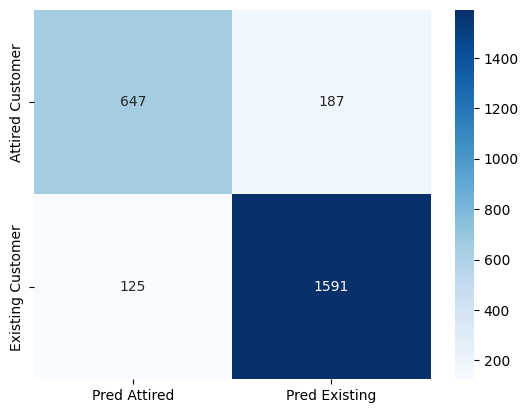

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_knn),
    cmap = 'Blues',
    annot = True,
    fmt = 'd',
    yticklabels = ['Attired Customer', 'Existing Customer'],
    xticklabels = ['Pred Attired', 'Pred Existing']
)